# Crime Rate prediction using Linear models

In [1]:
#import necessary modules for the exercise
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import subplots
import seaborn as sns

from scipy.stats import kurtosis, skew
from patsy import dmatrices

import statsmodels.api as sma
import statsmodels.formula.api as sm
import statsmodels.api as smq

/Users/bharathts/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Import dataset from csv file
crm_data = pd.read_csv('crime_v2.csv')

#To check the dimension of the data
crm_data.shape

(91, 25)

In [3]:
#To check columns in data
crm_data.columns.values

array(['county', 'year', 'crmrte', 'prbarr', 'prbconv', 'prbpris',
       'avgsen', 'polpc', 'density', 'taxpc', 'west', 'central', 'urban',
       'pctmin80', 'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed',
       'wsta', 'wloc', 'mix', 'pctymle'], dtype=object)

In [4]:
#Check the datatypes of all the features
crm_data.dtypes

county        int64
year          int64
crmrte      float64
prbarr      float64
prbconv     float64
prbpris     float64
avgsen      float64
polpc       float64
density     float64
taxpc       float64
west          int64
central       int64
urban         int64
pctmin80    float64
wcon        float64
wtuc        float64
wtrd        float64
wfir        float64
wser        float64
wmfg        float64
wfed        float64
wsta        float64
wloc        float64
mix         float64
pctymle      object
dtype: object

In [5]:
#Check data quality : Find out Missing values 
crm_data.isnull().sum()

#no missing values found

county      0
year        0
crmrte      0
prbarr      0
prbconv     0
prbpris     0
avgsen      0
polpc       0
density     0
taxpc       0
west        0
central     0
urban       0
pctmin80    0
wcon        0
wtuc        0
wtrd        0
wfir        0
wser        0
wmfg        0
wfed        0
wsta        0
wloc        0
mix         0
pctymle     0
dtype: int64

In [6]:
#There is discrepancy in the pctymle variable due to data entry : an extra string ` added at last record
print("before converison:", crm_data['pctymle'].dtypes)
crm_data['pctymle'] = crm_data['pctymle'].str.replace("`", '').astype('float')
print("after modification:", crm_data['pctymle'].dtypes)

before converison: object
after modification: float64


In [7]:
#check the overview of data : Basic Statistical summary 
crm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
county,91.0,101.615385,58.793569,1.000000,52.000000,105.000000,152.000000,197.000000
year,91.0,87.000000,0.000000,87.000000,87.000000,87.000000,87.000000,87.000000
crmrte,91.0,0.033400,0.018811,0.005533,0.020927,0.029986,0.039642,0.098966
prbarr,91.0,0.294917,0.136940,0.092770,0.205679,0.270950,0.344378,1.090910
prbconv,91.0,0.551279,0.352243,0.068376,0.345411,0.452830,0.588859,2.121210
prbpris,91.0,0.410766,0.080236,0.150000,0.364796,0.423423,0.456778,0.600000
avgsen,91.0,9.646813,2.846913,5.380000,7.340000,9.100000,11.420000,20.700001
polpc,91.0,0.001702,0.000987,0.000746,0.001231,0.001485,0.001877,0.009054
density,91.0,1.428837,1.514481,0.000020,0.547405,0.962264,1.568242,8.827652
taxpc,91.0,38.055066,13.077918,25.692865,30.662366,34.870213,40.948238,119.761452


In [8]:
#Sorting data based on Crime rate to overview data with high crime rate
crm_data.sort_values(by=['crmrte'], ascending=False)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
52,119,87,0.098966,0.149094,0.347800,0.486183,7.130000,0.002231,8.827652,75.672432,...,548.323853,354.676117,509.465515,354.300720,494.299988,568.400024,329.220001,379.769989,0.168699,0.079165
22,51,87,0.088385,0.155248,0.259833,0.407628,11.930000,0.001908,3.934551,35.699364,...,412.472046,213.752380,324.835724,257.334442,441.720001,433.940002,367.339996,333.709992,0.104743,0.142238
56,129,87,0.083498,0.236601,0.393413,0.415158,9.570000,0.002558,6.286487,67.679634,...,392.099915,220.452957,363.288025,292.702728,464.489990,548.489990,421.359985,319.079987,0.078714,0.081099
24,55,87,0.079016,0.224628,0.207831,0.304348,13.570000,0.004010,0.511509,119.761452,...,445.276215,189.743591,284.593292,221.390335,319.209992,338.910004,361.679993,326.079987,0.084373,0.076138
81,181,87,0.072948,0.182590,0.343023,0.548023,7.060000,0.001729,1.570281,27.591791,...,365.471619,279.227264,325.027100,213.582153,290.690002,453.529999,317.230011,286.450012,0.100039,0.079774
28,63,87,0.070660,0.133225,0.459216,0.363636,11.510000,0.002376,5.674497,50.199181,...,548.986511,238.915436,435.110718,391.308075,646.849976,563.770019,415.510010,362.579987,0.075854,0.094690
29,65,87,0.065880,0.287330,0.154452,0.403922,9.840000,0.001857,1.167984,30.628244,...,540.106140,209.057892,316.295532,216.458893,313.709992,543.030029,348.880005,329.160004,0.093643,0.076223
59,135,87,0.062897,0.092770,0.477733,0.385593,11.920000,0.002339,2.157500,35.992477,...,420.882965,179.128922,389.852203,292.225311,388.750000,509.950012,499.589996,333.049988,0.050918,0.133029
30,67,87,0.061418,0.217215,0.248276,0.488426,10.570000,0.002177,6.427185,45.899872,...,379.554657,189.180740,278.035217,230.498062,275.720001,419.070007,400.589996,313.549988,0.219997,0.076480
35,81,87,0.060450,0.300215,0.203725,0.431020,14.420000,0.002436,5.124424,44.210590,...,489.314392,308.576233,420.886383,305.154266,448.859985,563.719971,426.470001,333.640015,0.102554,0.083105


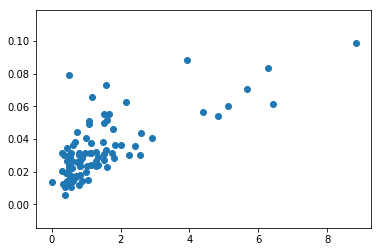

In [9]:
plt.scatter(crm_data.density,crm_data.crmrte)

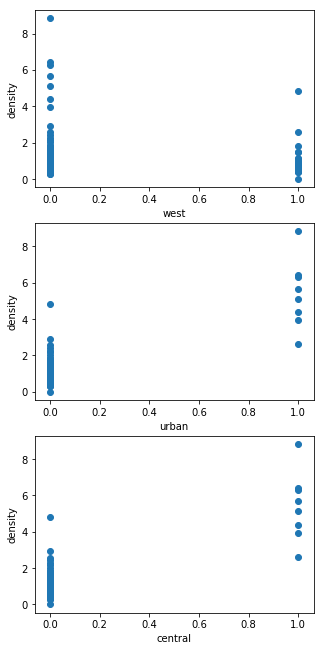

In [10]:
#Plotting density vs regions - to observe the density of people in certain regions. Urban region as larger density values desptie of having few counties. 
#central region has larger denisty counties
# fig,ax = subplots()
plt.rcParams["figure.figsize"] = [5,15]
plt.figure(1)
plt.subplot(411)
plt.scatter(crm_data.west,crm_data.density)
plt.xlabel('west')
plt.ylabel('density')

plt.subplot(412)
plt.scatter(crm_data.urban,crm_data.density)
plt.xlabel('urban')
plt.ylabel('density')

plt.subplot(413)
plt.scatter(crm_data.urban,crm_data.density)
plt.xlabel('central')
plt.ylabel('density')

plt.show()

In [11]:
#Verifying relation of regions on crime rate
print(crm_data.groupby(['west'])['crmrte'].mean(), "\n",
      crm_data.groupby(['urban'])['crmrte'].mean(),"\n",
      crm_data.groupby(['central'])['crmrte'].mean())

#even though there are less number of county belongs to Urban region,
# the average crime rate in that area is higher compared to other regions

west
0    0.037201
1    0.022162
Name: crmrte, dtype: float64 
 urban
0    0.029825
1    0.070494
Name: crmrte, dtype: float64 
 central
0    0.030950
1    0.037508
Name: crmrte, dtype: float64


In [12]:
#Verifying relation among regions and percent of minority (as of 1980)

print(crm_data.groupby(['central'])['pctmin80'].mean(),crm_data.groupby(['west'])['pctmin80'].mean(),crm_data.groupby(['urban'])['pctmin80'].mean())

#West region has lesser percent of minority population as compared to other regions

central
0    26.075333
1    24.523348
Name: pctmin80, dtype: float64 west
0    31.799908
1     6.856263
Name: pctmin80, dtype: float64 urban
0    25.390105
1    26.588630
Name: pctmin80, dtype: float64


In [13]:
#Verifying relation among regions and percent of young male population
crm_data.groupby(['central'])['pctymle'].mean(),crm_data.groupby(['west'])['pctymle'].mean(),crm_data.groupby(['urban'])['pctymle'].mean()

# The proportion of young male population is distributed equally across regions

(central
 0    0.085775
 1    0.080922
 Name: pctymle, dtype: float64, west
 0    0.084567
 1    0.082173
 Name: pctymle, dtype: float64, urban
 0    0.083280
 1    0.091041
 Name: pctymle, dtype: float64)

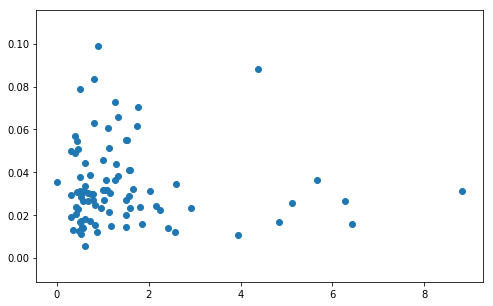

In [18]:
#plotting relation between density and crime rate
plt.rcParams["figure.figsize"] = [8,5]
plt.scatter(crm_data['density'].unique(), crm_data.groupby(['density'])['crmrte'].mean())


In [19]:
#Selecting numeric features for further analysis
col = crm_data.columns.tolist()

# Dropping 'year', 'county', columns from analysis beacuse it has same value and not contributing any information 
col.remove('year')
col.remove('county')
print(col, len(col))

['crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen', 'polpc', 'density', 'taxpc', 'west', 'central', 'urban', 'pctmin80', 'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc', 'mix', 'pctymle'] 23


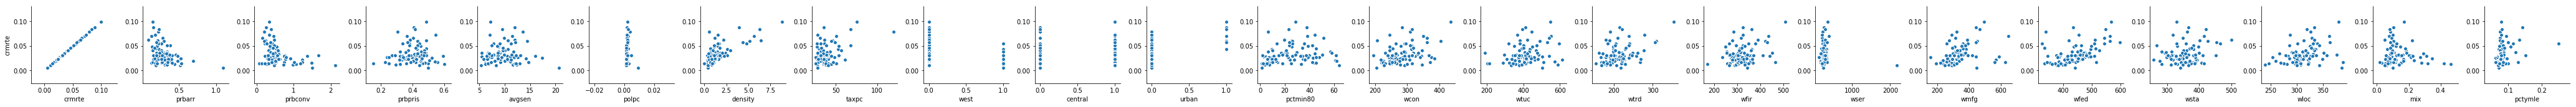

In [20]:
#Using Seaborn mocule to plot distribution of data with respect to target varaible. 
sns.pairplot(data=crm_data, x_vars=col, y_vars='crmrte')

#Click on the graph to expand it

In [21]:
#Based on the above distributions, it is evident that lot of features are skewed and outliers are present. 

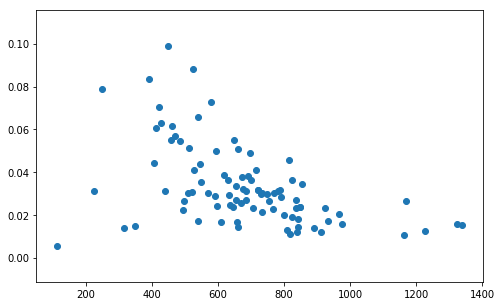

In [22]:
#To get better distribution view of polpc feature, the feature has been transformed.
#its an inverse transform. 

plt.scatter(1/crm_data.polpc,crm_data.crmrte)
#the plot reveals that polpc is direclty proportional to crime rate.  
#POlice are quite actively identifying more cases in their region

# Validating Assumptions of Linear model

# Assumptions of Linear regression models: 
1. Linear relationship among dependent and independent data
2. Data should not contain outliers
3. Multivariate normality
4. There should be No or little multicollinearity
5. The data should not have auto-correlation
6. The residuals provides Homoscedasticity

In the following blocks, the above mentionded assumptions are tested and performed appropriate operations to satisity the criterions 

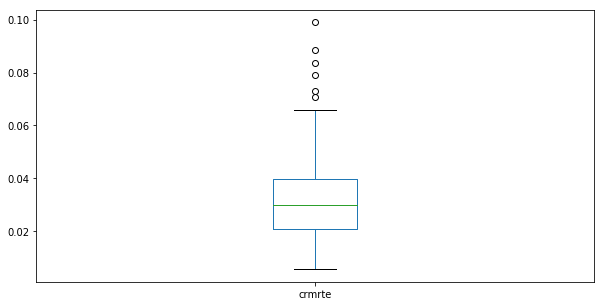

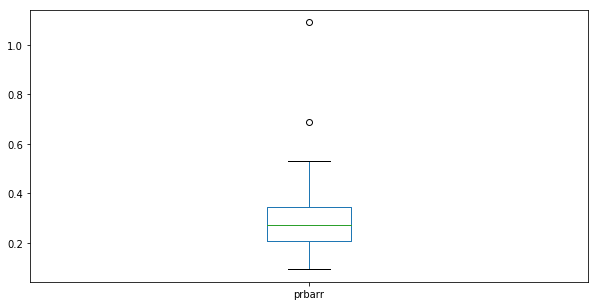

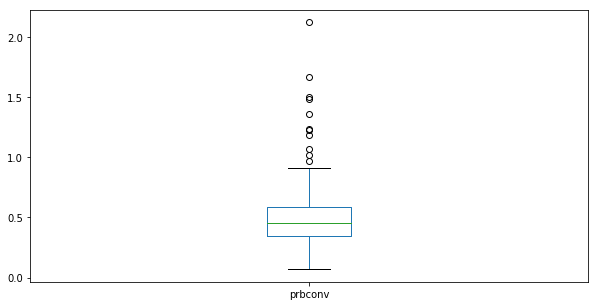

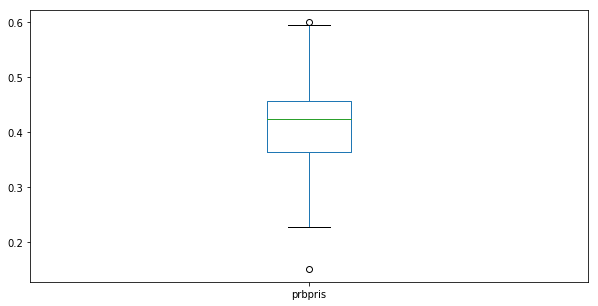

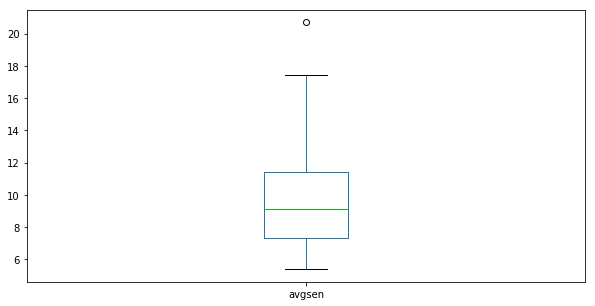

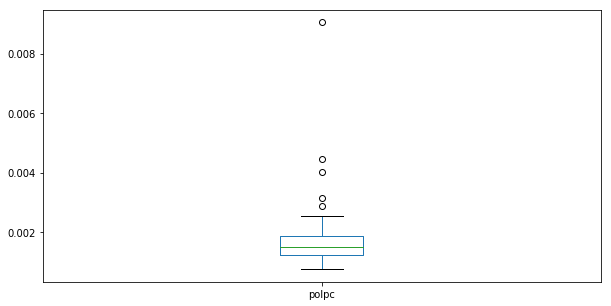

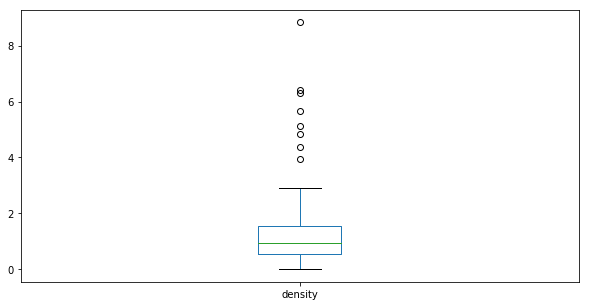

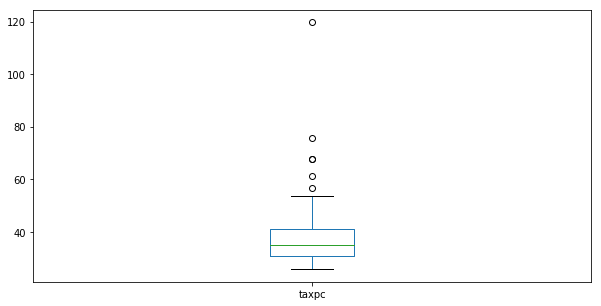

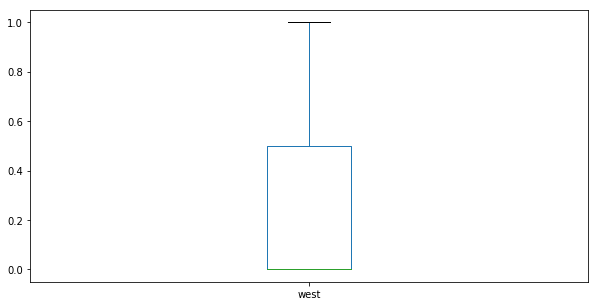

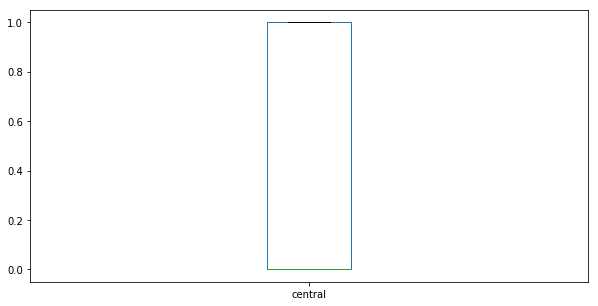

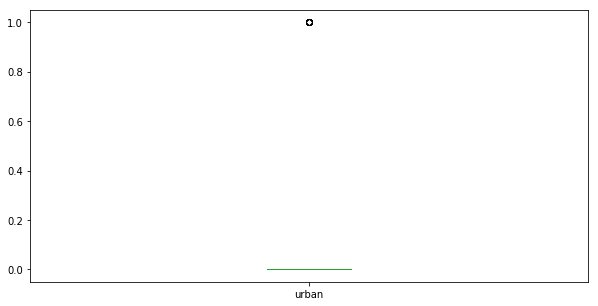

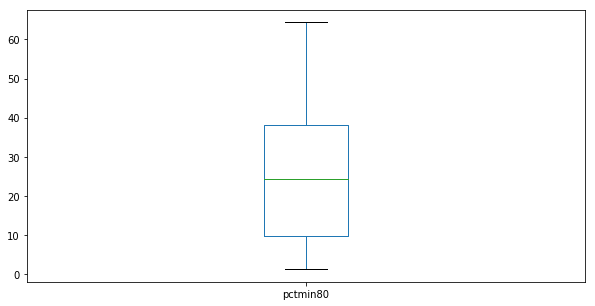

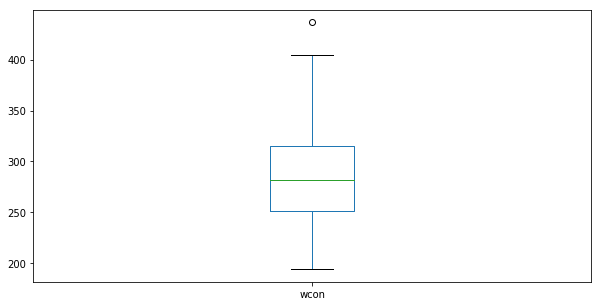

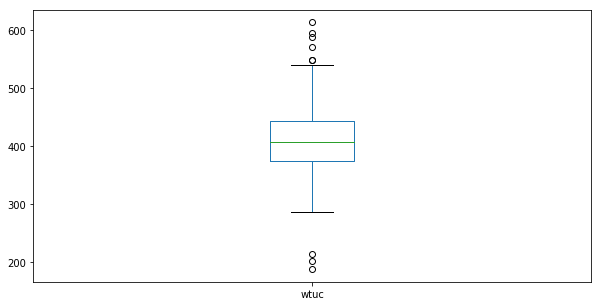

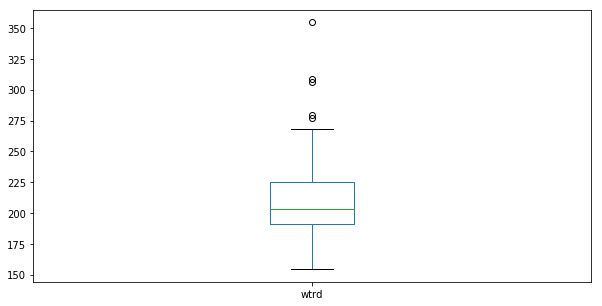

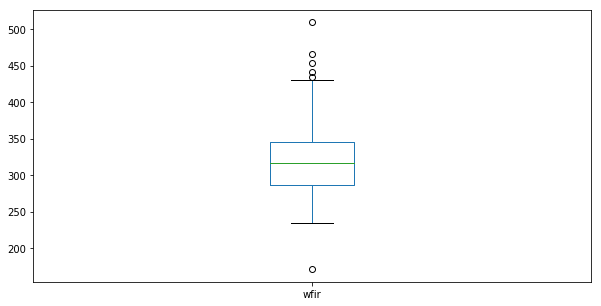

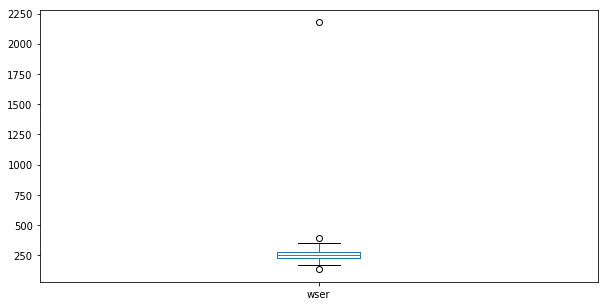

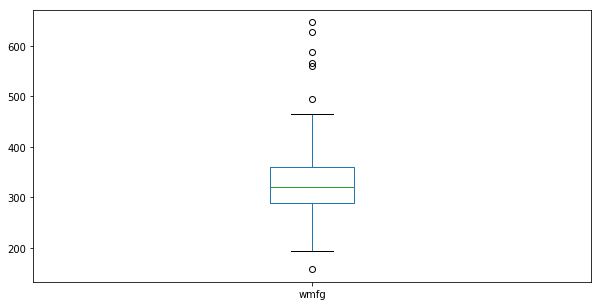

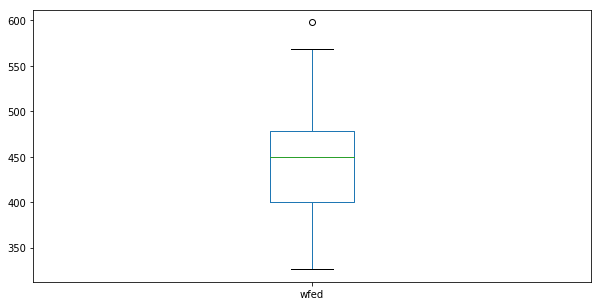

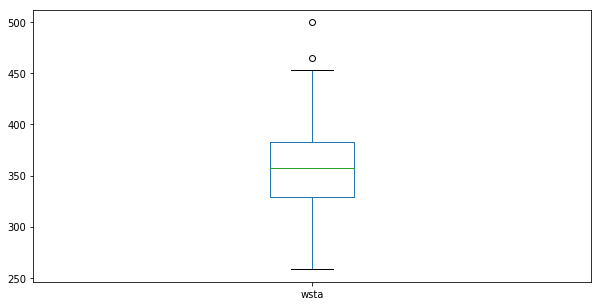

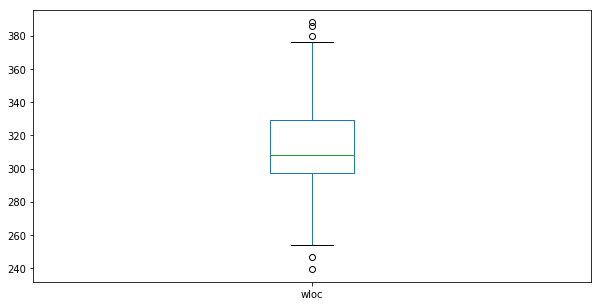

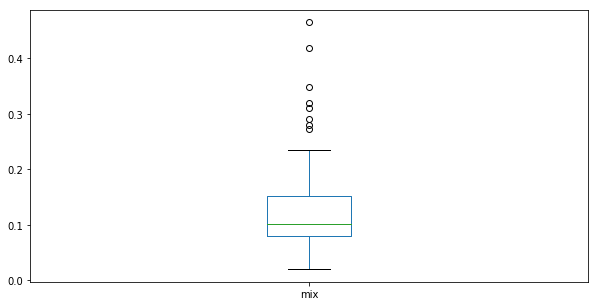

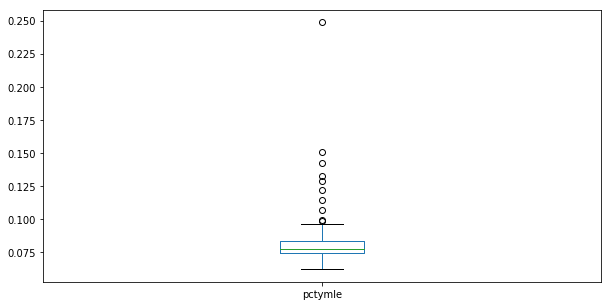

In [23]:
# There should not be any Outliers in the data. 
# Using box plot and percentile values to identify and treat outlier values
from matplotlib.pyplot import subplots
for i in col:
    crm_data[i].plot(kind='box', figsize=[10,5])
    plt.show()
    

the above boxplot detects outliers in the data. the data points whcih are away from upper and lower whiskers are treated as outliers. 
whose values are >Q3 + (1.5 * IQR) and <Q1 - (1.5 * IQR)
where IQR ~ Inter Quantile Range

Outlier Treatment
Capping upper extreme values with 85th, 90th and 95th percentile values based on their distribution and lower extreme values with 5th percentile

In [24]:
df=crm_data.copy()

pc_percentiles = df['prbconv'].quantile([0.05,0.85]).values
df['prbconv'] = df['prbconv'].apply(lambda x: pc_percentiles[0] if x < pc_percentiles[0] else (pc_percentiles[1] if x > pc_percentiles[1] else x))

pm_percentiles = df['pctymle'].quantile([0.05,0.85]).values
df['pctymle'] = df['pctymle'].apply(lambda x: pm_percentiles[0] if x < pm_percentiles[0] else (pm_percentiles[1] if x > pm_percentiles[1] else x))

ur_percentiles = df['urban'].quantile([0.05,0.95]).values
df['urban'] = df['urban'].apply(lambda x: ur_percentiles[0] if x < ur_percentiles[0] else (ur_percentiles[1] if x > ur_percentiles[1] else x))

rest_col = [l for l in col if l not in ['prbconv', 'pctymle', 'urban']]

for i in rest_col:
    percentiles = df[i].quantile([0.05,0.90]).values
    df[i] = df[i].apply(lambda x: percentiles[0] if x < percentiles[0] else (percentiles[1] if x > percentiles[1] else x))



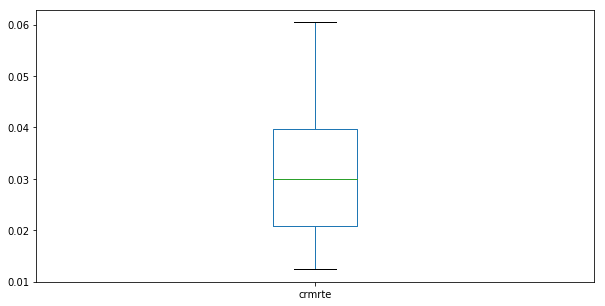

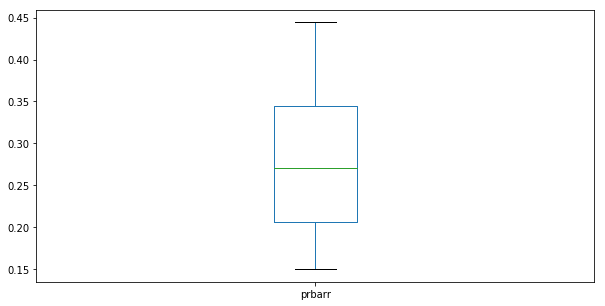

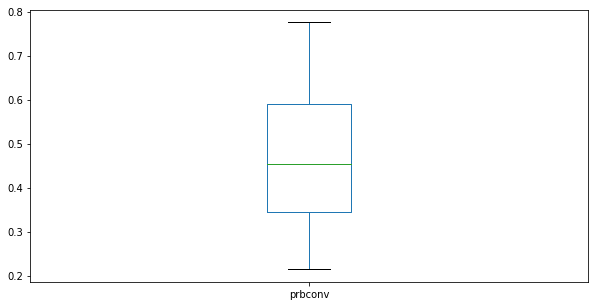

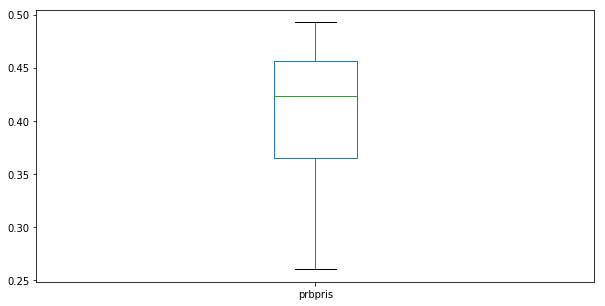

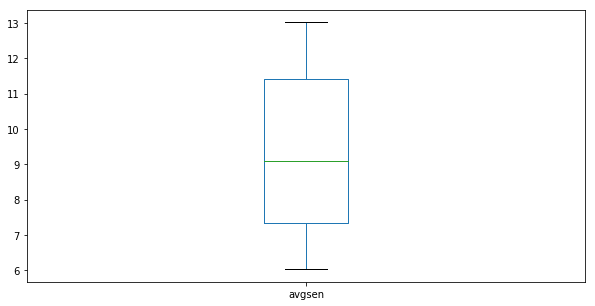

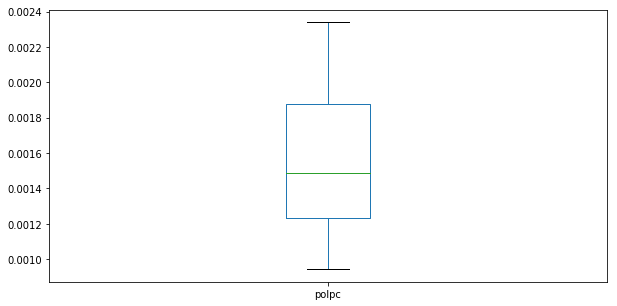

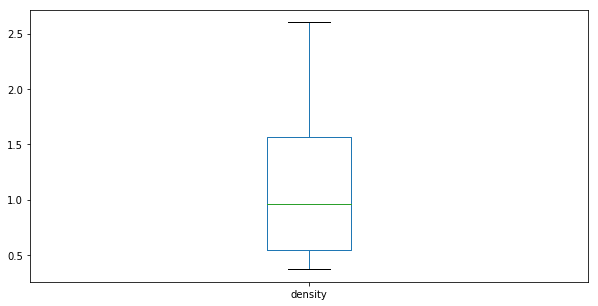

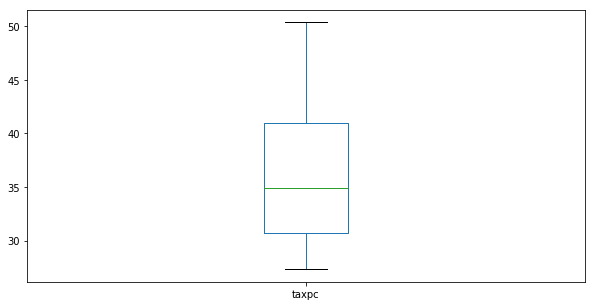

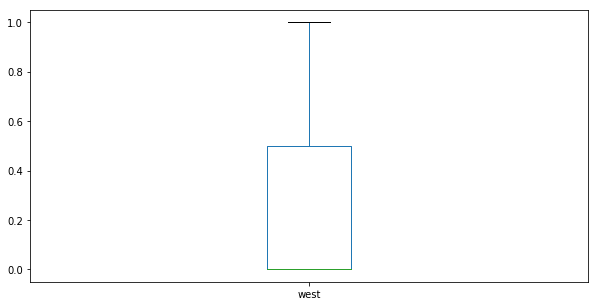

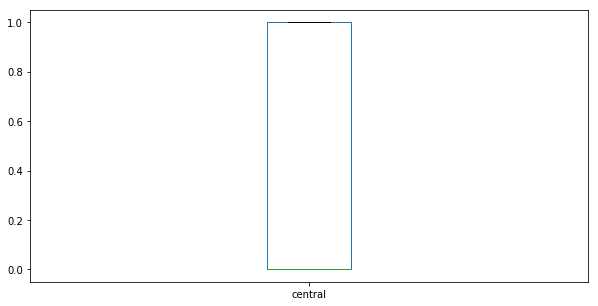

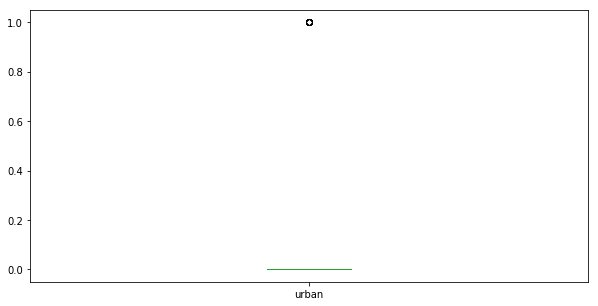

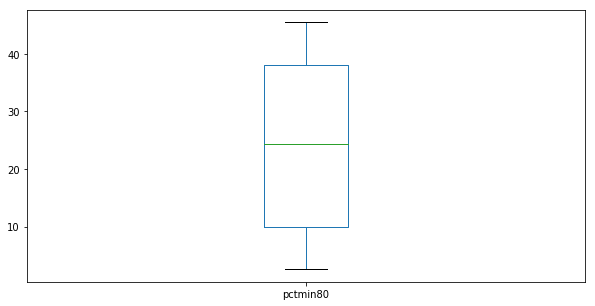

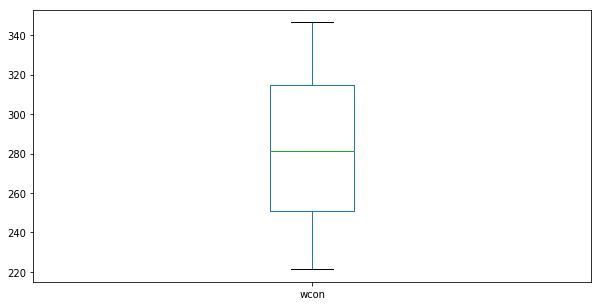

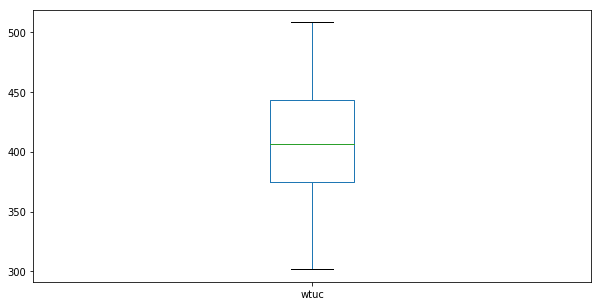

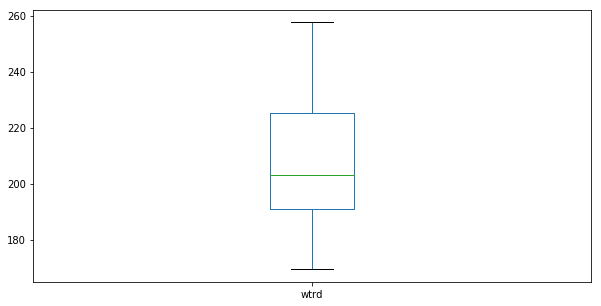

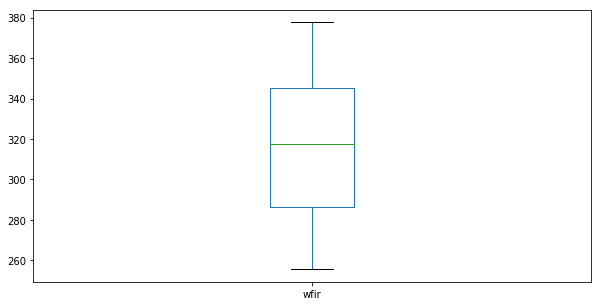

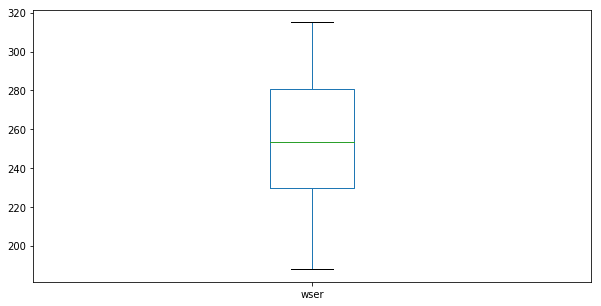

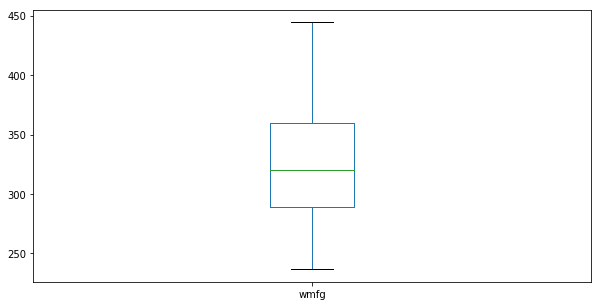

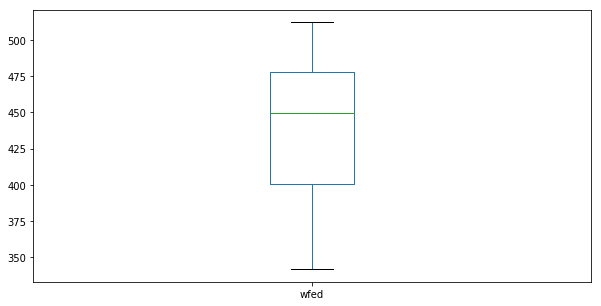

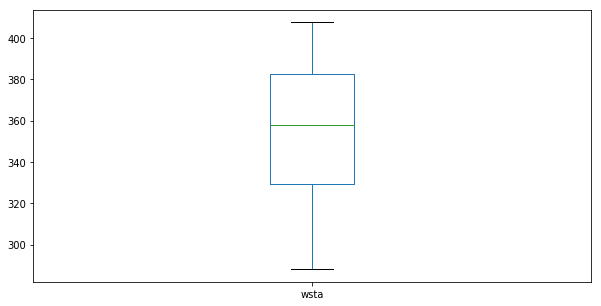

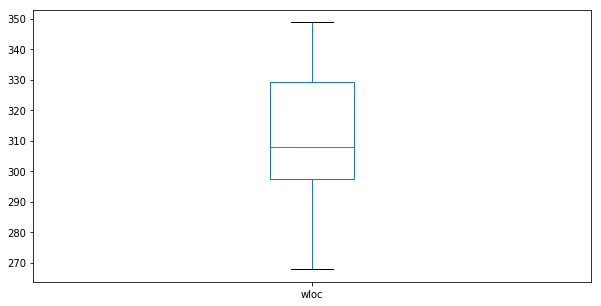

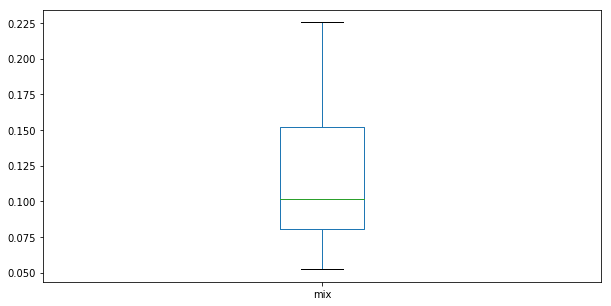

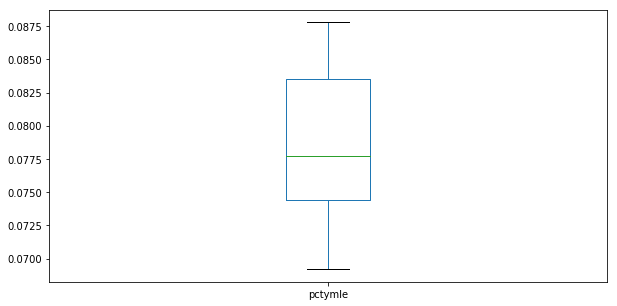

In [25]:
#observing the boxplot once again to visualize data after outlier treatment
for i in col:
    df[i].plot(kind='box', figsize=[10,5])
    plt.show()
    

Multicollinearity in the independent data

In [27]:
#Check correlation of numeric variables 
df[col].corr()

,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
crmrte,1.000000,-0.378725,-0.429292,0.055094,0.112171,0.565768,0.681965,0.275930,-0.368376,0.190645,...,0.233333,0.315532,0.245776,0.283562,0.427565,0.467790,0.155332,0.389505,-0.069297,0.339582
prbarr,-0.378725,1.000000,-0.211387,0.020861,-0.100823,-0.175053,-0.375230,-0.089150,0.077957,-0.125257,...,-0.103923,-0.121290,-0.229876,-0.282725,-0.266387,-0.238104,-0.148299,-0.217646,0.483574,-0.192917
prbconv,-0.429292,-0.211387,1.000000,-0.020673,0.020448,-0.325335,-0.275265,-0.258303,0.030432,-0.060394,...,-0.025365,-0.095853,0.101678,-0.024636,-0.006441,0.036565,-0.107154,0.006610,-0.275414,-0.243969
prbpris,0.055094,0.020861,-0.020673,1.000000,-0.203251,0.020803,0.063752,-0.052609,-0.060332,0.172885,...,0.042425,0.131392,-0.020925,-0.020377,0.036994,0.107280,0.046456,0.090765,0.200904,0.052921
avgsen,0.112171,-0.100823,0.020448,-0.203251,1.000000,0.307470,0.132383,0.103632,0.045746,-0.114781,...,0.192674,0.061432,0.163256,-0.019983,0.104952,0.142451,0.116037,0.045495,-0.109811,0.081398
polpc,0.565768,-0.175053,-0.325335,0.020803,0.307470,1.000000,0.482228,0.409947,0.019643,0.147056,...,0.254253,0.153308,0.276845,0.333878,0.454749,0.382008,0.140308,0.361848,-0.034438,0.289078
density,0.681965,-0.375230,-0.275265,0.063752,0.132383,0.482228,1.000000,0.220475,-0.144370,0.410155,...,0.294653,0.541439,0.539762,0.563529,0.521365,0.617634,0.139184,0.531520,-0.256657,0.271114
taxpc,0.275930,-0.089150,-0.258303,-0.052609,0.103632,0.409947,0.220475,1.000000,-0.213949,0.098397,...,0.136488,0.080184,0.070340,0.339218,0.294268,0.053536,0.020163,0.179540,0.009031,0.035590
west,-0.368376,0.077957,0.030432,-0.060332,0.045746,0.019643,-0.144370,-0.213949,1.000000,-0.396902,...,0.123397,-0.113718,0.041757,0.020481,-0.068448,-0.146429,-0.089186,-0.066875,-0.148913,-0.142951
central,0.190645,-0.125257,-0.060394,0.172885,-0.114781,0.147056,0.410155,0.098397,-0.396902,1.000000,...,0.155534,0.340708,0.221826,0.255709,0.208592,0.333501,0.066969,0.297353,-0.045636,0.036021


it seems 'density', 'wfed', 'wfir' has more correlation with other features but it is not significant enough to drop them in first step.
hence retianing them to obvserve model performance 

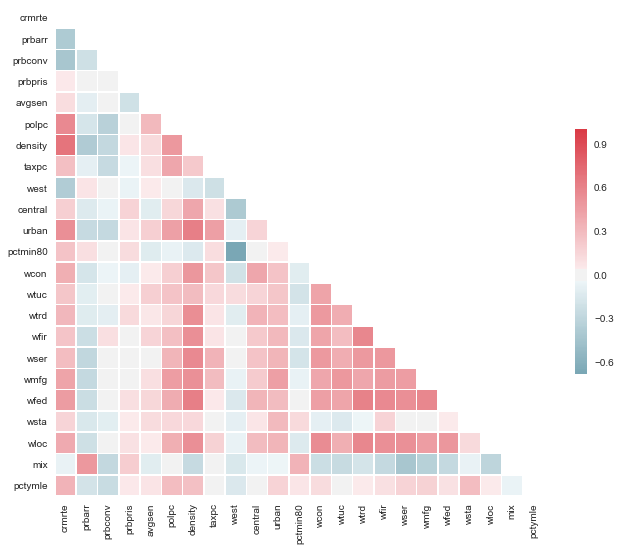

In [28]:
#Visaulization of correlation matrix using seaborn 
sns.set(style="white")

# Compute the correlation matrix
corr = df[col].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [29]:
#Data should be normally distributed

In [30]:
#Calcualte Skewness and Kurtosis values to identify features failing normal distribution
for i in col:
    print(i,skew(crm_data[i]), kurtosis(crm_data[i]))

crmrte 1.2987939750544237 1.5273837552832443
prbarr 2.5443422444709207 11.355986552250181
prbconv 2.046849947917565 4.7606507561908495
prbpris -0.4600985421988332 0.704895368143228
avgsen 0.9942507798492628 1.5034532637743707
polpc 5.003427312957523 32.779263459464254
density 2.6636076718117163 7.6405131875646255
taxpc 3.2991597455355666 15.838415857302405
west 1.137873909204391 -0.7052429667519173
central 0.5224574779878928 -1.7270381836945305
urban 2.9105644713987484 6.471385542168676
pctmin80 0.38051434540520035 -0.7933803231344063
wcon 0.6098309760426086 0.2514124425031854
wtuc 0.045997578070558 1.1340663852175332
wtrd 1.3987685158251344 2.9487048030934933
wfir 0.7955111400390739 1.636607839905773
wser 8.742639622080638 78.17210031524719
wmfg 1.4395877913746369 2.770364977010063
wfed 0.11920883593554059 -0.2899765372905607
wsta 0.37728272807757063 0.7663254624168983
wloc 0.2699013395836006 0.6991811825312535
mix 1.9329633210708301 4.059551730046666
pctymle 4.589346892302818 26.6983

In [31]:
#Calcualte Skewness and Kurtosis values to identify features failing normal distribution - outlier treatment data
for i in col:
    print(i,skew(df[i]), kurtosis(df[i]))

crmrte 0.6381363775026025 -0.6646272810892508
prbarr 0.31106090457551416 -0.9456651359650148
prbconv 0.3770015532055798 -0.9358683263545728
prbpris -0.6397571584184868 -0.4813431911541506
avgsen 0.1476669955813741 -1.2437485899111211
polpc 0.5118388042486246 -0.8355634276386654
density 0.8496424511561524 -0.4935073419922422
taxpc 0.6376945020524344 -0.7588356249521455
west 1.137873909204391 -0.7052429667519173
central 0.5224574779878928 -1.7270381836945305
urban 2.9105644713987484 6.471385542168676
pctmin80 0.0130177430330317 -1.411837889367518
wcon 0.14498701316026458 -1.125511575720143
wtuc 0.10802755046111645 -0.6496931930442167
wtrd 0.40558764432608735 -0.726444174517999
wfir 0.018955262709929557 -1.0712429015036151
wser 0.02737009846681111 -0.9291662820687869
wmfg 0.5686309734856485 -0.49555070691450354
wfed -0.341705694185667 -0.8973762929784392
wsta -0.25071782498320055 -0.8669056054322968
wloc -0.03154048756884888 -0.7013713083715474
mix 0.8384835206545624 -0.5029361826565886
p

/Users/bharathts/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


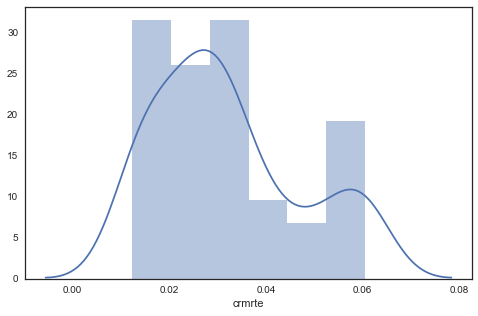

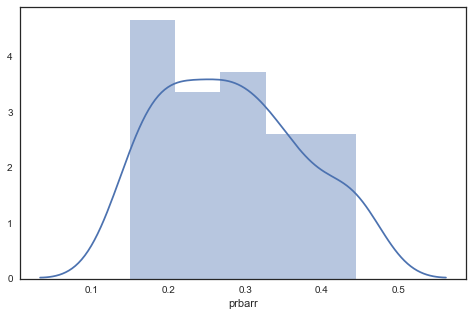

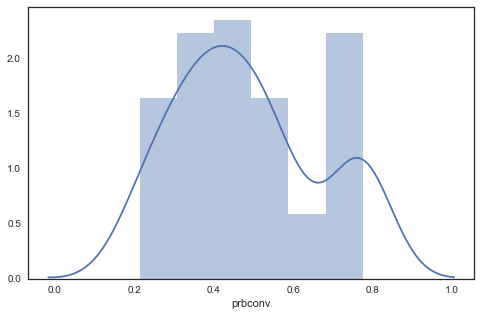

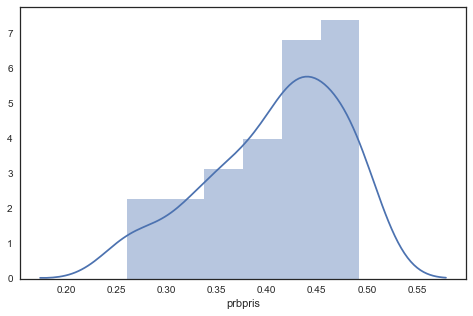

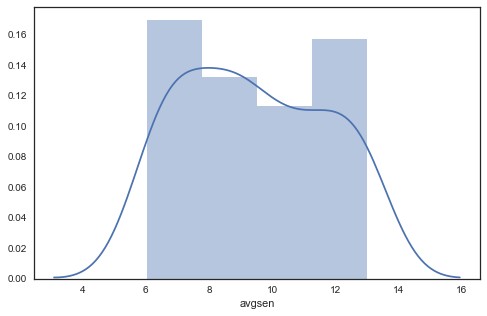

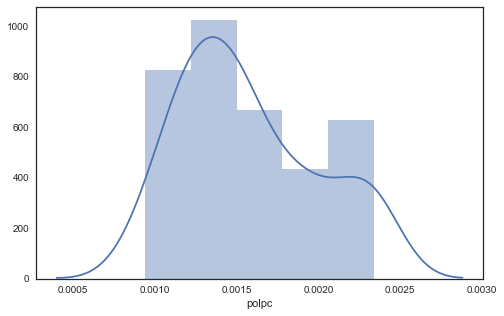

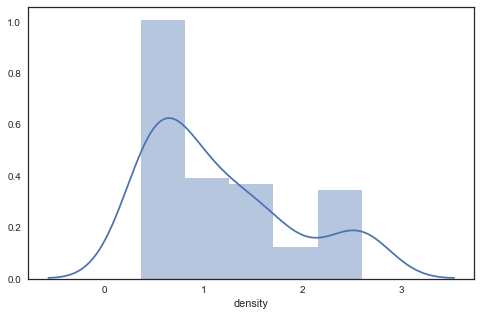

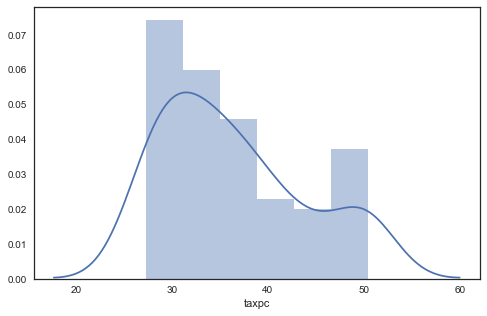

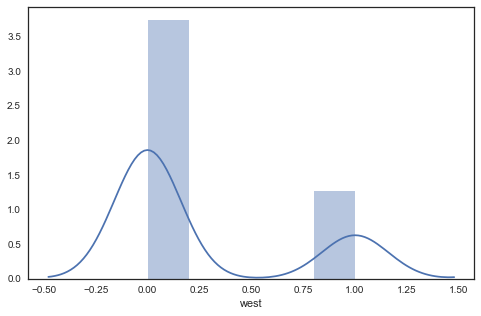

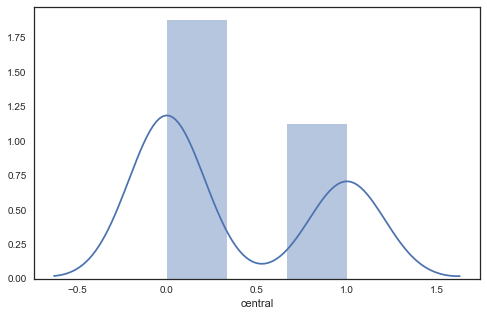

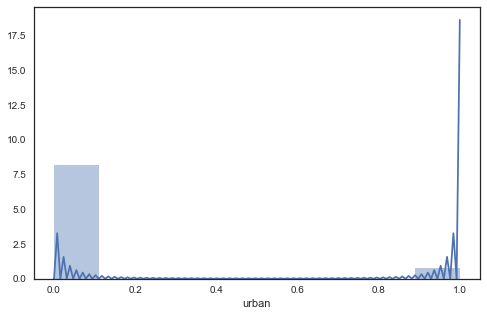

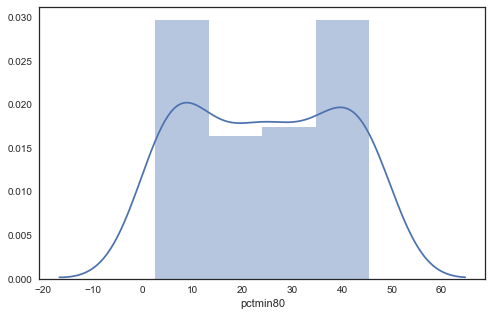

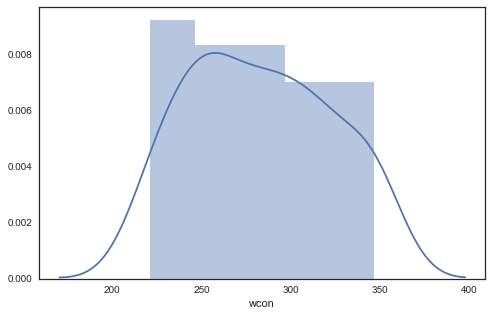

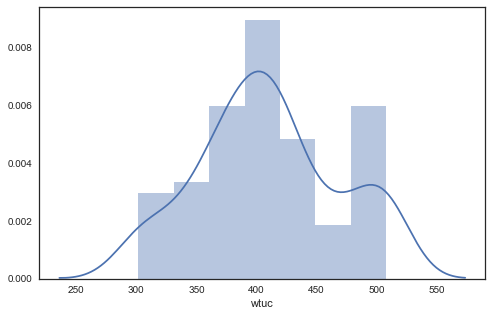

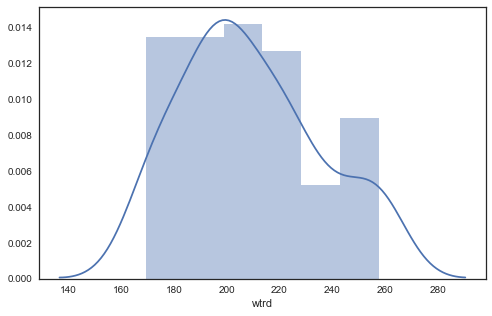

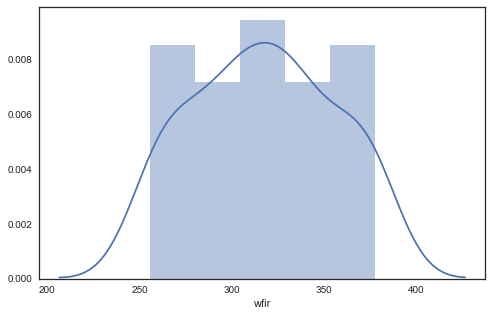

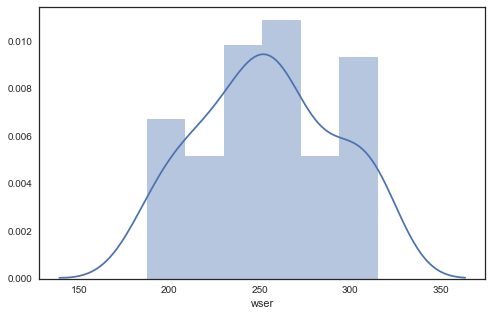

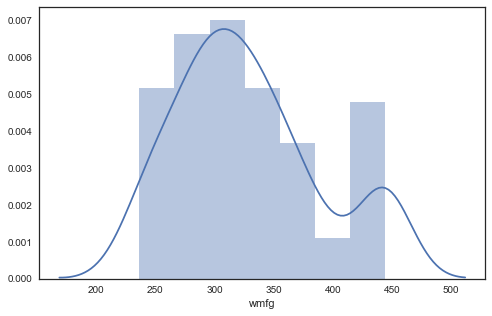

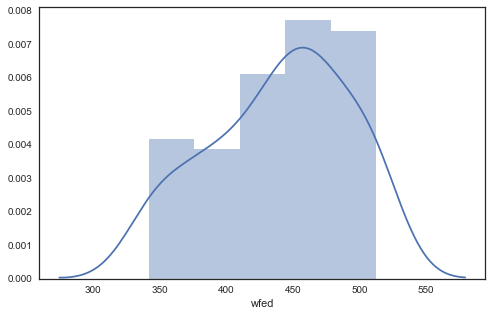

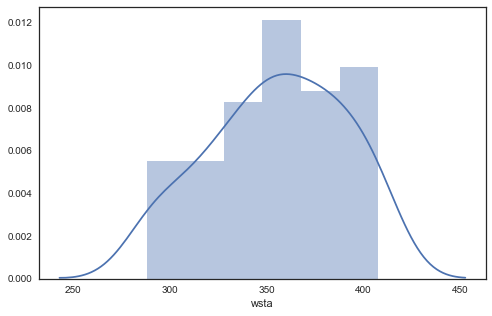

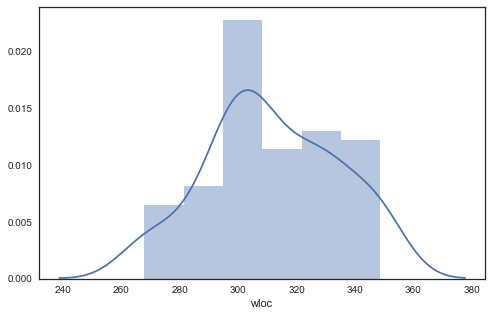

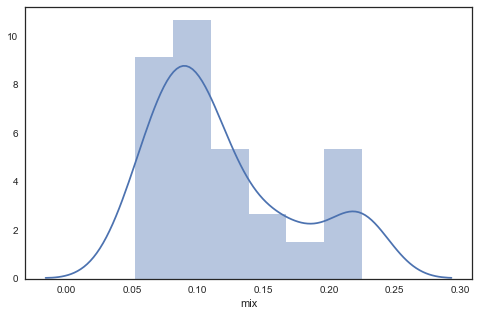

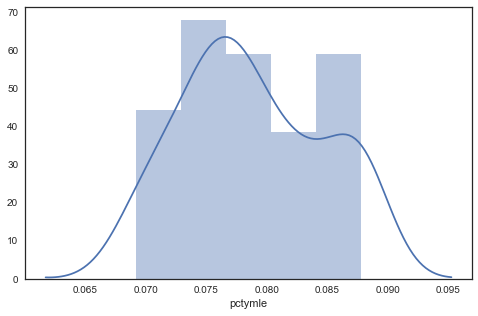

In [32]:
#Visual representation of dsitribution plots 
for i in col:
    fig, ax = subplots()
    sns.distplot(df[i])
    

In [33]:
#Duplicating list of column names for ease of use in model development phase 
indep_col = col.copy()
indep_col.remove('crmrte')

In [34]:
#Normalize data into standard scale using Normalizer from preprocessing module
from sklearn import preprocessing
scaled_df = preprocessing.normalize(df[indep_col])
scaled_df = pd.DataFrame(scaled_df, columns=df[indep_col].columns.values)


#but the scaling and normalizing was not helpful in model development hence continued to use original data

In [35]:
#Performed Stepwise regression to observe the contribution of each feature and attain best results 

vif_col = indep_col.copy()


vif_col.remove('urban')
vif_col.remove('pctymle')
vif_col.remove('mix')
vif_col.remove('prbpris')
vif_col.remove('wmfg')
vif_col.remove('wloc')
vif_col.remove('wser')
vif_col.remove('wtrd')
vif_col.remove('wsta')

#Certain features were removed as they were not satisfying the null hypothesis 

In [36]:
#To transform Crime Rate data into normal distribution form. Natural log is applied on the crmrte feature

Mean squared error: 0.07
Root Mean squared error: 0.27
Train score: 0.822160840432
Test score: 0.669713408595


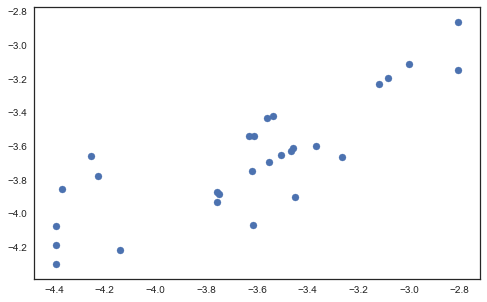

In [37]:
#Develop Linear Regression model. model data is separted as train and test data samples at 70%:30% ratio
lr = linear_model.LinearRegression()

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df[vif_col], np.log(df.crmrte), test_size=0.3, random_state=105)

lr.fit(x_train,y_train)
pred = lr.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))

# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, pred)))


print("Train score:", lr.score(x_train,y_train)) 
print("Test score:", lr.score(x_test, y_test))

plt.scatter(y_test,pred)
plt.show()


In [39]:
#Calculating Variance Inflation Factor (VIF) to observe the multicollinearity of features during model development
features = "+".join(x_train[vif_col].columns)
vcol = vif_col + ['crmrte']

# get y and X dataframes based on this regression:
yd, Xd = dmatrices('crmrte ~' + features, df[vcol], return_type='dataframe')

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xd.values, i) for i in range(Xd.shape[1])]
vif["features"] = Xd.columns
vif.round(1)

,VIF Factor,features
0,224.3,Intercept
1,1.4,prbarr
2,1.6,prbconv
3,1.3,avgsen
4,1.9,polpc
5,3.1,density
6,1.4,taxpc
7,3.4,west
8,1.8,central
9,2.7,pctmin80


                            OLS Regression Results                            
Dep. Variable:                 crmrte   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     17.43
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           4.50e-14
Time:                        19:45:37   Log-Likelihood:                 11.480
No. Observations:                  63   AIC:                             5.039
Df Residuals:                      49   BIC:                             35.04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8093      0.425     -8.958      0.0

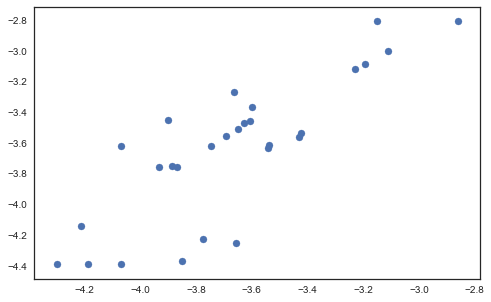

In [40]:
#Using Statmodels modules to get more information about linear model parameters, summary and stats details

X_train = sma.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(x_test) 

lm2 = sm.OLS(y_train,X_train).fit()

print(lm2.summary())

pred_lm = lm2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_lm))

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, pred_lm)))

# Explained variance score: 1 is perfect prediction
print('train score %.2f' %lm2.rsquared)
print('test score: %.2f' % r2_score(y_test, pred_lm))

plt.scatter(pred_lm,y_test)
plt.show()

The model data has been separated into Train and Test samples at 70:30 ratio. (Resulted in 63 samples in train and 28 samples in test data) Test data helps in validaiton of model and leads to development of better models based on the behaivour of model on unseen datapoints. 

OLS - Ordinary Least Squares technique is used in linear model learning. Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data calculate the distance from each data point to the regression line, square it and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

In this case, Crime rate is the dependent variable and we have data associated with each county such as police per capita, to which region the county belongs to, average wages of people in that county etc., Prepared the input data to satisfy all the criterias for linear model.

Used sklearn and statmodels modules to get linear models packages/functions.  

By following stepwise regression, selecting features based on p_values and 
removing features which showed multicollinearity based on vif value. the above model was finalised. 

Final model has rsquare value : 0.82
Root mean square error : 0.27

observed: if the leniency is given to p_value rules then better model with lesser error and higher variance of determination can be achived.

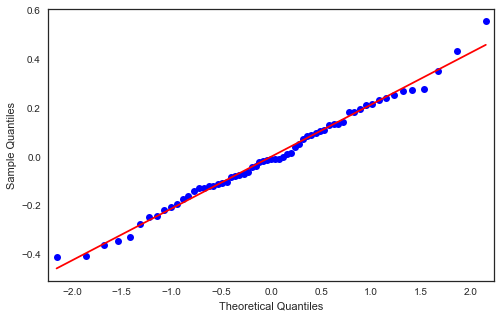

In [41]:
#PLooting Quantile to Quantile plot to observe the normality residuals
fig4=smq.qqplot(lm2.resid, line='r')

In [42]:
# Residuals are normally distributed
# Checking normality of residuals We use Shapiro Wilk test  from scipy library to check the normality of residuals.
# Null Hypothesis: The residuals are normally distributed.
# Alternative Hypothesis: The residuals are not normally distributed.

from scipy import stats
stats.shapiro(lm2.resid)

# Since the pvalue is 0.9034 thus at 5% level of significance we can say that the residuals are normally distributed.

(0.9903129935264587, 0.9034987092018127)

In [43]:
#Autocorrelation:

# Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(lm2.resid , lags = 1) 

# Since p-value is 0.19410989 thus we can accept the null hypothesis and can say that autocorrelation is absent.

(array([ 1.68614522]), array([ 0.19410989]))

In [44]:
#heteroscadisicity

# Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(lm2.resid, lm2.model.exog)
lzip(name, test)

# The p-value is 0.283545053 hence we can say that the residuals have constant variance. Hence we can say that all the assumptions of our linear regression model are satisfied

[('F statistic', 1.3172203359289376), ('p-value', 0.28354505355892251)]

# Scope of Improvements

1. General Linear models can be used to develop better models
2. Increase in sample size of datasets leads to better learning of models
3. Can try using Non-linear models, Tree-based models to understand the behivaour of data and prediction capability
4. Shall use penalizing techniques like lasso and ridge to reduce the overfitting 
5. More number of features and more data points help to capture randomness in data 
6. Create more features by combining features to get new perception 

